# ADA Project : Dunnhumby dataset, Tell me what you buy and I will tell you who you are



## Abstract
We would like to analyse the Dunnhumby dataset. Living in a time and age where every piece of our data is stored and analysed; and being active consumers ourselves, we would like to see what informations retail chains can gather and infer about us knowing only our shopping habits. As transactions over two years of several households and their basic demographic profiles are provided, we want to see if there are any links and correlations between specific demographics (e.g. marital status, income, number of children, etc) and purchase patterns. Furthermore, if time permits it, we want to see if we can create a model predicting a consumer demographic profile from their shopping. Thus, we would like to see how "easy" and how precise it actually is for retailers to infer who their customer is by what they buy and target them with specific marketing. Basically, we want to know how much of a target we actually
are.

**Research questions:** 
- What are the main shopping trends that we can identify in this data ?
- Can we relate shopping trends to specific demographic parameters ?
- Can we predict some of these demographic parameters (age, marital statute etc) with knowing the household's habbits?
- In the opposite way, can we predict household consumption behaviour with knowing its characteristics?
- What accuracy in consumption prediction can the retailer obtain from a simple profile information?

## Task 1: Clean up the data and prepare the sets we want to keep

In [1]:
%matplotlib inline
import pandas as pd

import matplotlib.pyplot as plt

import os

In [2]:
os.getcwd()

'C:\\Users\\goffe\\Documents\\ada\\epfl-ada-2019-project-bubble582\\code'

In [3]:
'''As we said in the description of our project, we are going to concentrate on 3 of the 8 tables :
- hh_demographic.csv
- transaction_data.csv
- product.csv
In this first step, we want to load the data, and prepare it for the analysis'''

#load the data
hh_demographic = pd.read_csv('../data/dunnhumby_complete_csv/hh_demographic.csv', sep = ',')

transaction_data = pd.read_csv('../data/dunnhumby_complete_csv/transaction_data.csv', sep = ',')

product = pd.read_csv('../data/dunnhumby_complete_csv/product.csv', sep = ',')

### Task 1.A: What's actually in the dataset ? 
This dataset contains household level transactions over two years from a group of 2,500 households who are frequent shoppers at a retailer. It contains all of each household’s purchases, not just those from a limited number of categories. For certain households, demographic information as well as direct marketing contact history are included. We have a look at a few samples from each table: 

#### A. Transaction data: 
Dataset of all products purchased by households during the study. Each line in the table is what could essentially be found in a store reciept. The attributes of the dataset are the following: 

- HOUSEHOLD_KEY: identifies each household, **unique**
- BASKET_ID: identifies a purchase occasion, **unique**
- DAY: day when transaction occured
- PRODUCT_ID: identifies each product, **unique**
- QUANTITY: Number of products purchased during trip
- SALES_VALUE: Amount of dollars retailer recieves from sale
- STORE_ID: identifies store, **unique**
- COUPON_MATCH_DISC: discount applied du to retailer's match of manufacturer coupon
- COUPON_DISC: discount applied due to manufacturer coupon
- RETAIL_DISC: discount applied due to retailer's loyalty card program
- TRANS_TIME: time of day when transaction occured
- WEEK_NO: week of the transaction. Ranges from 1-102. 

In [4]:
transaction_data.head(4)

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,2375,26984851472,1,1004906,1,1.39,364,-0.6,1631,1,0.0,0.0
1,2375,26984851472,1,1033142,1,0.82,364,0.0,1631,1,0.0,0.0
2,2375,26984851472,1,1036325,1,0.99,364,-0.3,1631,1,0.0,0.0
3,2375,26984851472,1,1082185,1,1.21,364,0.0,1631,1,0.0,0.0


**Q1: How many transactions occured during the two years ?**

In [5]:
print("In total there were %d transaction during the two years." %transaction_data.count()['household_key'])

In total there were 2595732 transaction during the two years.


**Q2: How many purchase occasions occured during the two years ?** <br>
Attention : here transactions are not what we usually think of. It's like on a reciept so the number of total unique purchases is not the number of transactions but the total of unique basket_id. 

In [6]:
print("In total there were %d purchase occasions during the two years." %len(transaction_data['BASKET_ID'].unique()))

In total there were 276484 purchase occasions during the two years.


#### B. Demographic data: 
Demographic info for a certain portion of households. Contains only the data for 801 households of 2500 though. The rest could not be aquiered. The attributes of the dataset are the following: 
 
- HOUSEHOLD_KEY : identifies each household, **unique**
- AGE_DES: estimated age range
- MARITAL_STATUS_CODE: A (Married), B (Single), C (Unknown)
- INCOME_DESC : Household income
- HOMEOWNER_DESC: Homeowner, renter, etc
- HH_COMP_DEC: Household composition
- HOUSEHOLD_SIZE_DESC: Size of household up to 5+ 
- KID_CATEGORY_DESC: Number of children present up to 3+ 

In [7]:
hh_demographic.head(4)

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,household_key
0,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1
1,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,7
2,25-34,U,25-34K,Unknown,2 Adults Kids,3,1,8
3,25-34,U,75-99K,Homeowner,2 Adults Kids,4,2,13


**Q3: How many age categories are there ? And what are they ?**


In [8]:
print("In total there are %d age categories" %len(hh_demographic['AGE_DESC'].unique()))
print("The different categories are:", hh_demographic['AGE_DESC'].unique())

In total there are 6 age categories
The different categories are: ['65+' '45-54' '25-34' '35-44' '19-24' '55-64']


**Q4: How many income categories are there ? And what are they ?**

In [9]:
print("In total there are %d income categories" %len(hh_demographic['INCOME_DESC'].unique()))
print("The different categories are:", hh_demographic['INCOME_DESC'].unique())

In total there are 12 income categories
The different categories are: ['35-49K' '50-74K' '25-34K' '75-99K' 'Under 15K' '100-124K' '15-24K'
 '125-149K' '150-174K' '250K+' '175-199K' '200-249K']


**Q5: How many homeowner categories are there ? And what are they ?**

In [10]:
print("In total there are %d homeowner categories" %len(hh_demographic['HOMEOWNER_DESC'].unique()))
print("The different categories are:", hh_demographic['HOMEOWNER_DESC'].unique())

In total there are 5 homeowner categories
The different categories are: ['Homeowner' 'Unknown' 'Renter' 'Probable Renter' 'Probable Owner']


**Q7: How many household composition categories are there ? And what are they ?**

In [22]:
print("In total there are %d household composition categories" %len(hh_demographic['HH_COMP_DESC'].unique()))
print("The different categories are:", hh_demographic['HH_COMP_DESC'].unique())

In total there are 6 household composition categories
The different categories are: ['2 Adults No Kids' '2 Adults Kids' 'Single Female' 'Unknown'
 'Single Male' '1 Adult Kids']


**Q8: How many household size categories are there ? And what are they ?**

In [23]:
print("In total there are %d household size categories" %len(hh_demographic['HOUSEHOLD_SIZE_DESC'].unique()))
print("The different categories are:", hh_demographic['HOUSEHOLD_SIZE_DESC'].unique())

In total there are 5 household size categories
The different categories are: ['2' '3' '4' '1' '5+']


**Q9: How many kid number categories are there ? And what are they ?**

In [24]:
print("In total there are %d kid number categories" %len(hh_demographic['KID_CATEGORY_DESC'].unique()))
print("The different categories are:", hh_demographic['KID_CATEGORY_DESC'].unique())

In total there are 4 kid number categories
The different categories are: ['None/Unknown' '1' '2' '3+']


#### C. Product data: 
Information on each product sold such as type of product, national or private label and a brand identifier. The attributes of the dataset are the following: 
- PRODUCT_ID: **unique**, identifies product
- DEPARMENT: groups similar products together
- COMMODITY_DESC: groups similar products together at a lower level
- SUB_COMMODITY_DESC: groups similar products together at the lowest level. 
- MANUFACTURER: code that links products with the same manufacturer together 
- BRAND: indicates private or national label brand
- CURR_SIZE_OF_PRODUCT: indicates package size (not available for all) 

Let's have a look: 

In [14]:
product.head(4)

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ


**Q10: How many products are there ?**

In [15]:
print("In total there are %d products" %product.count()['PRODUCT_ID'])

In total there are 92353 products


**Q11: How many department categories are there ? And what are they ?**

In [16]:
print("In total there are %d department categories" %len(product['DEPARTMENT'].unique()))
print("The different categories are:", product['DEPARTMENT'].unique())

In total there are 44 department categories
The different categories are: ['GROCERY' 'MISC. TRANS.' 'PASTRY' 'DRUG GM' 'MEAT-PCKGD' 'SEAFOOD-PCKGD'
 'PRODUCE' 'NUTRITION' 'DELI' 'COSMETICS' 'MEAT' 'FLORAL'
 'TRAVEL & LEISUR' 'SEAFOOD' 'MISC SALES TRAN' 'SALAD BAR' 'KIOSK-GAS'
 'ELECT &PLUMBING' 'GRO BAKERY' 'GM MERCH EXP' 'FROZEN GROCERY'
 'COUP/STR & MFG' 'SPIRITS' 'GARDEN CENTER' 'TOYS' 'CHARITABLE CONT'
 'RESTAURANT' 'RX' 'PROD-WHS SALES' 'MEAT-WHSE' 'DAIRY DELI' 'CHEF SHOPPE'
 'HBC' 'DELI/SNACK BAR' 'PORK' 'AUTOMOTIVE' 'VIDEO RENTAL' ' '
 'CNTRL/STORE SUP' 'HOUSEWARES' 'POSTAL CENTER' 'PHOTO' 'VIDEO'
 'PHARMACY SUPPLY']


**Q12: Are all produts in the product dataset represented in transactions ?**
There are 92 353 products. As for the households, we can investigate whether all the products are represented in the *transaction_data* table.

In [17]:
print("There are %d products in the transactions table" %len(transaction_data['PRODUCT_ID'].unique()))

There are 92339 products in the transactions table


There are 92 339 products represented in the *transaction_data* table, meaning that only **14** are not represented. We can more easily imagine to do an inner join, and just drop those 14 products. 

### TASK 1.B: Simple plots

#### Arrange the categories in a meaningful way

##### A. HH-demographic

In [37]:
hh_demographic.head(4)

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,household_key
0,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1
1,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,7
2,25-34,U,25-34K,Unknown,2 Adults Kids,3,1,8
3,25-34,U,75-99K,Homeowner,2 Adults Kids,4,2,13


In [39]:
ordered_age= ['19-24','25-34','35-44','45-54','55-64', '65+' ]

hh_demographic.AGE_DESC.astype("category",
                      ordered = True,
                      categories = ordered_age)

print ('The order of the age categories is :', ordered_age)

The order of the age categories is : ['19-24', '25-34', '35-44', '45-54', '55-64', '65+']


In [49]:
ordered_income= ['Under 15K','15-24K','25-34K','35-49K','50-74K','75-99K','100-124K',
                 '125-149K','150-174K','175-199K','200-249K','250K+']

hh_demographic.INCOME_DESC.astype("category",
                      ordered = True,
                      categories = ordered_income)

print ('The order of the income categories is :', ordered_income)

The order of the income categories is : ['Under 15K', '15-24K', '25-34K', '35-49K', '50-74K', '75-99K', '100-124K', '125-149K', '150-174K', '175-199K', '200-249K', '250K+']


In [50]:
ordered_homeowner= ['Unknown','Probable Renter','Renter','Probable Owner','Homeowner']

hh_demographic.HOMEOWNER_DESC.astype("category",
                      ordered = True,
                      categories = ordered_homeowner)

print ('The order of the homeowner categories is :', ordered_homeowner)

The order of the homeowner categories is : ['Unknown', 'Probable Renter', 'Renter', 'Probable Owner', 'Homeowner']


In [51]:
ordered_hh_comp= ['Unknown','Single Female','Single Male','1 Adult Kids','2 Adults No Kids','2 Adults Kids']

hh_demographic.HH_COMP_DESC.astype("category",
                      ordered = True,
                      categories = ordered_hh_comp)

print ('The order of the household composition categories is :', ordered_hh_comp)

The order of the household composition categories is : ['Unknown', 'Single Female', 'Single Male', '1 Adult Kids', '2 Adults No Kids', '2 Adults Kids']


In [54]:
ordered_hh_size= ['1','2','3','4','5+']

hh_demographic.HOUSEHOLD_SIZE_DESC.astype("category",
                      ordered = True,
                      categories = ordered_hh_size)

print ('The order of the household size categories is :', ordered_hh_size)

The order of the household size categories is : ['1', '2', '3', '4', '5+']


In [55]:
ordered_kid_number= ['None/Unknown','1','2','3+']

hh_demographic.KID_CATEGORY_DESC.astype("category",
                      ordered = True,
                      categories = ordered_kid_number)

print ('The order of the kid number categories is :', ordered_kid_number)

The order of the kid number categories is : ['None/Unknown', '1', '2', '3+']


In [18]:
hh_demographic.groupby('AGE_DESC').count()

,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,household_key
AGE_DESC,,,,,,,
19-24,46,46,46,46,46,46,46
25-34,142,142,142,142,142,142,142
35-44,194,194,194,194,194,194,194
45-54,288,288,288,288,288,288,288
55-64,59,59,59,59,59,59,59
65+,72,72,72,72,72,72,72


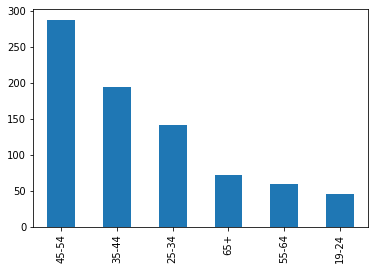

In [19]:
hh_demographic['AGE_DESC'].value_counts().plot(kind='bar')

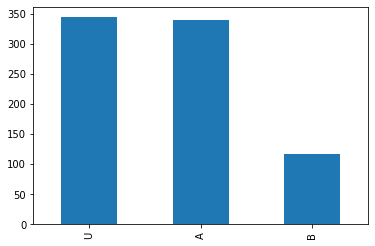

In [20]:
hh_demographic['MARITAL_STATUS_CODE'].value_counts().plot(kind='bar')

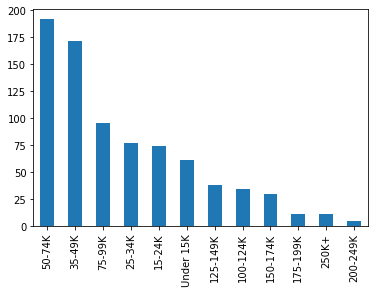

In [21]:
hh_demographic['INCOME_DESC'].value_counts().plot(kind='bar')

PS:
- we should continue to make some plots
- we should order the categories when it makes sense, so that the plots are more meaningful